In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import statsmodels.api as sm
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

# I- Calcul vol via high-low + Estim H 

In [2]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['Plus Haut'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Plus Bas'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

daily_difference = data['Plus Haut'] - data['Plus Bas']

data.set_index('Date', inplace=True)

squared_returns1 = daily_difference ** 2


In [3]:
def run1(h):
    vol_prox = squared_returns1.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())
        
    
    

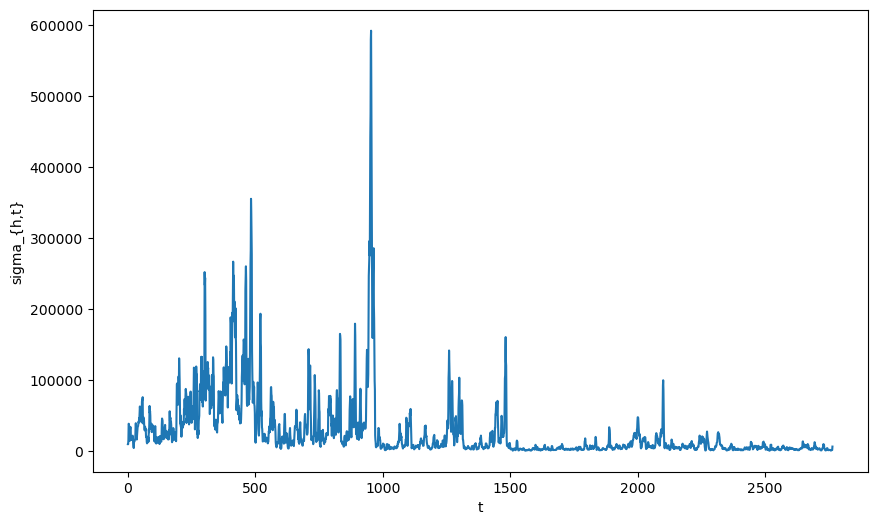

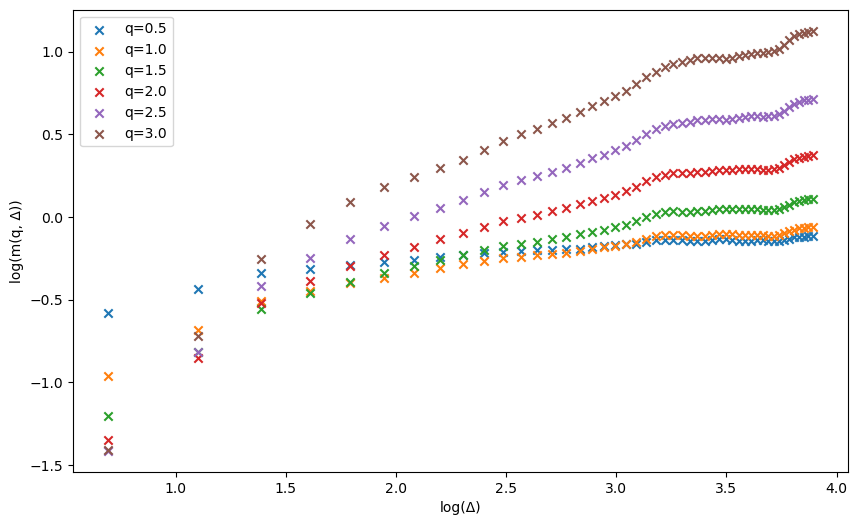

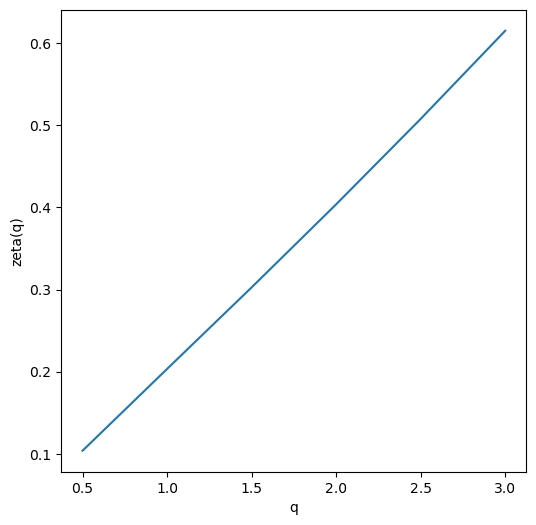

Estimation du coefficient de Hurst, H: 0.2038835101728808
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.733e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.00e-08
Time:                        09:30:17   Log-Likelihood:                 27.098
No. Observations:                   6   AIC:                            -50.20
Df Residuals:                       4   BIC:                            -50.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [4]:
run1(4)

# II- Calcul vol close-open + Estim H 

In [5]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')
data['Dernier'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Ouv.'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

daily_difference = data['Dernier'] - data['Ouv.']

data.set_index('Date', inplace=True)

squared_returns2 = daily_difference ** 2


In [6]:
def run2(h):
    vol_prox = squared_returns2.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())
        

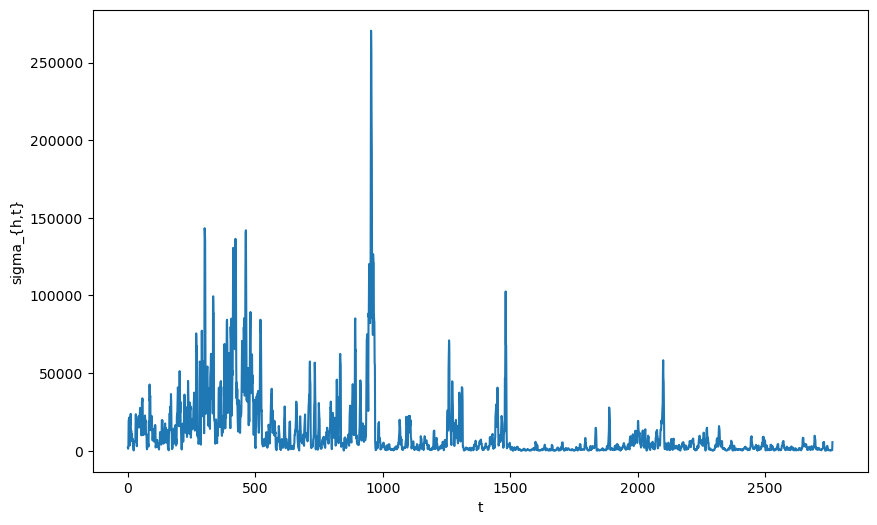

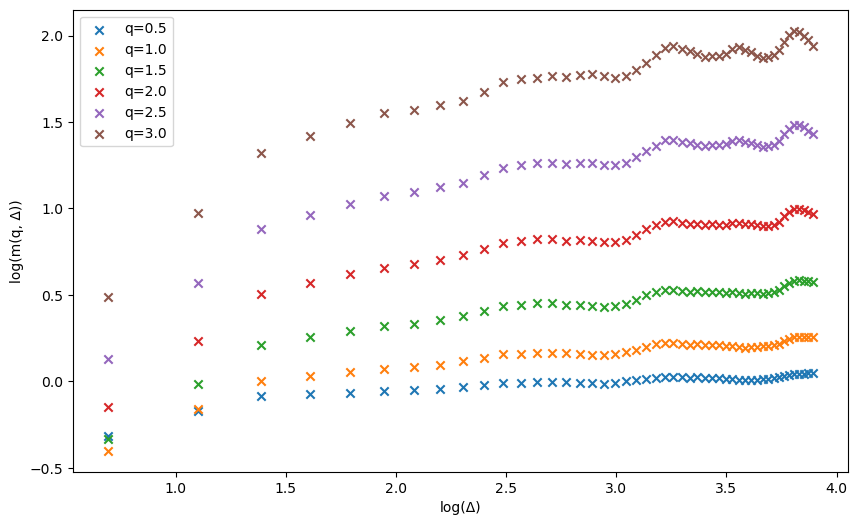

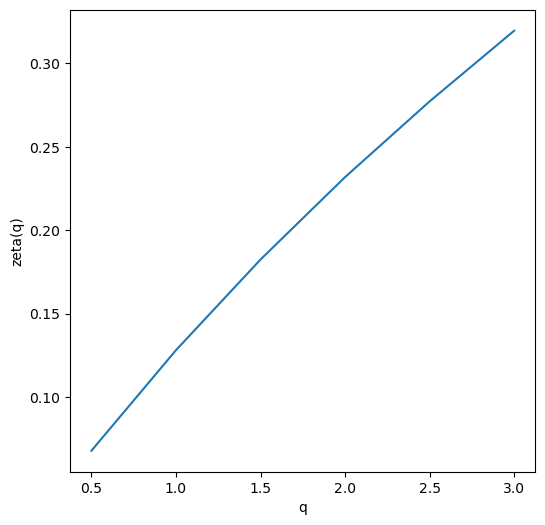

Estimation du coefficient de Hurst, H: 0.10032405291948157
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     934.7
Date:                Sat, 04 May 2024   Prob (F-statistic):           6.82e-06
Time:                        09:30:24   Log-Likelihood:                 22.592
No. Observations:                   6   AIC:                            -41.18
Df Residuals:                       4   BIC:                            -41.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/opt/mamba/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [7]:
run2(4)

# III-Calcul vol via mesure de Garman and Klass (1980) (considère pas de drift dans les prix)

In [8]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Close'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Open'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns3 = ((data['High']- data['Low'])**2)/2 - (2*m.log(2)-1)*((data['Close']-data['Open'])**2)

In [9]:
def run3(h):
    vol_prox = squared_returns3.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())

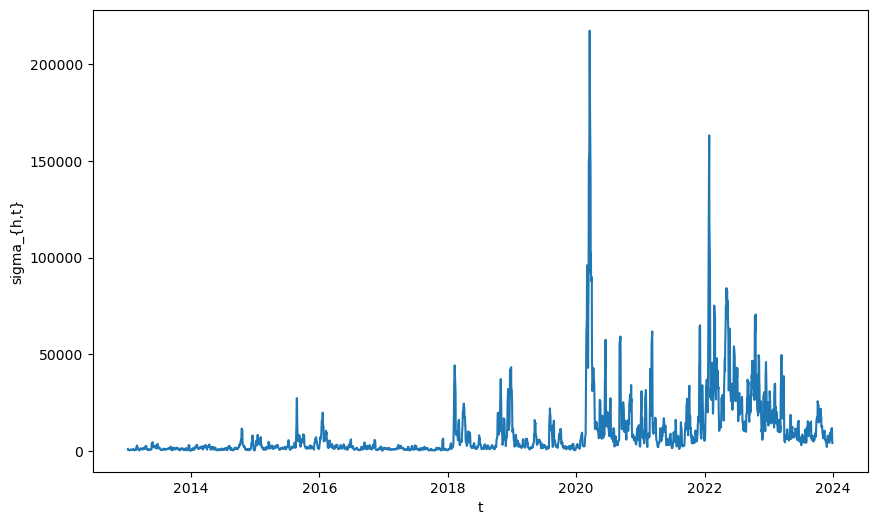

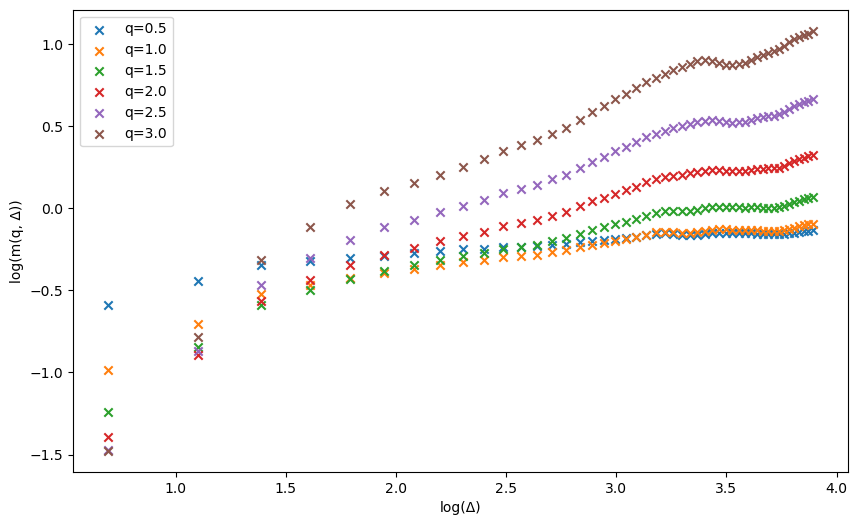

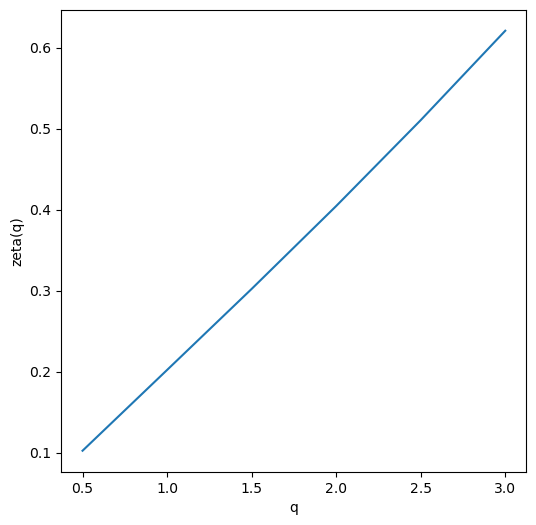

Estimation du coefficient de Hurst, H: 0.2068781988695945
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):           5.98e-08
Time:                        09:30:26   Log-Likelihood:                 25.364
No. Observations:                   6   AIC:                            -46.73
Df Residuals:                       4   BIC:                            -47.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [10]:
run3(4)

# IV-Calcul vol via mesure Parkinson (1980) (considère un BM géom sans drift dans les prix)

In [11]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns4 = (.361)*((data['High']- data['Low'])**2)

In [12]:
def run4(h):
    vol_prox = squared_returns4.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())
        

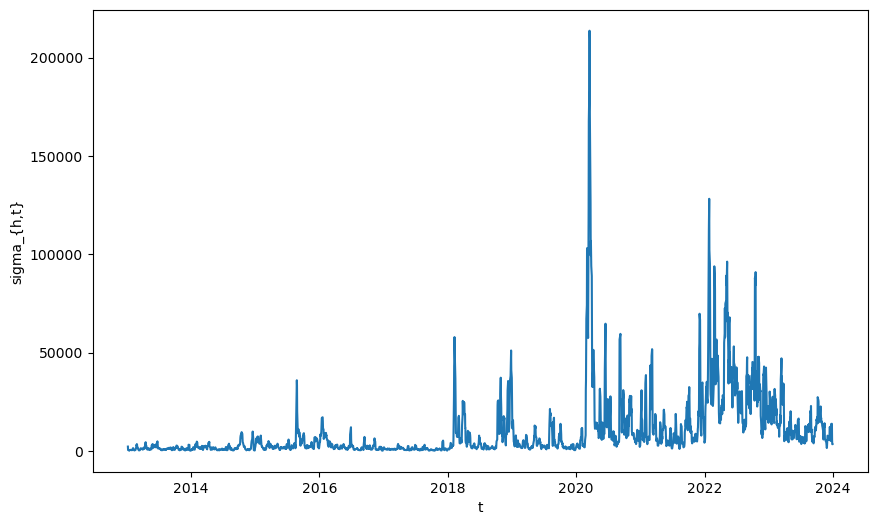

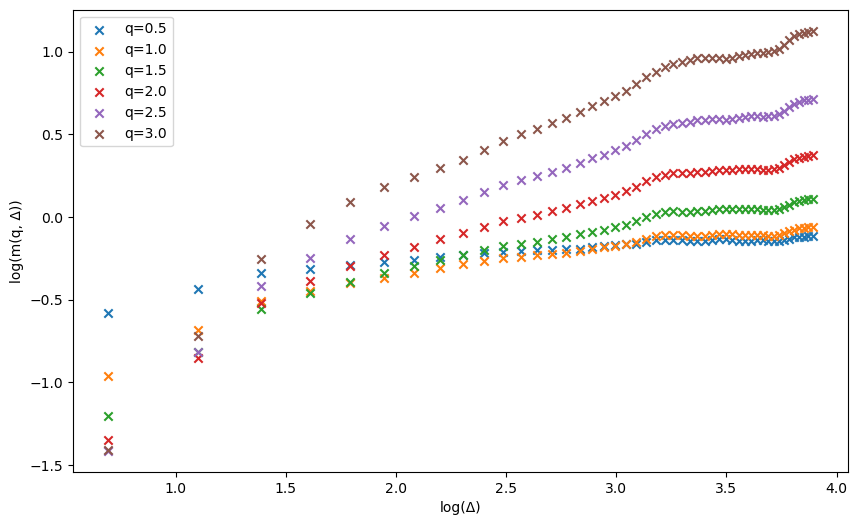

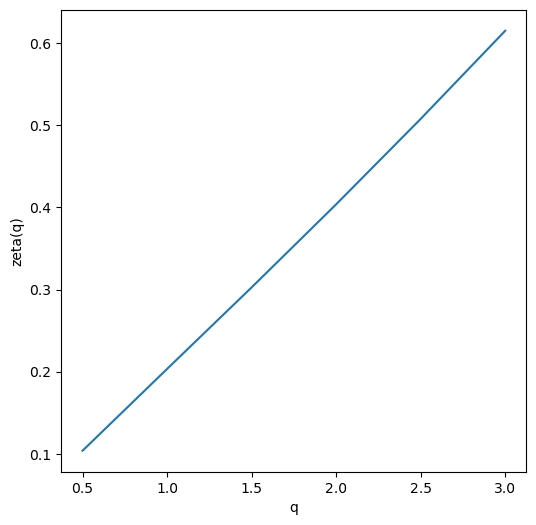

Estimation du coefficient de Hurst, H: 0.2038835101728807
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.733e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.00e-08
Time:                        09:30:28   Log-Likelihood:                 27.098
No. Observations:                   6   AIC:                            -50.20
Df Residuals:                       4   BIC:                            -50.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/mamba/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
run4(4)

# V-Calcul vol via mesure Roger, Satchell and Yoon (1994) (pour prendre en compte un drift non nul)

In [16]:
data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=';')

data['High'] = data['Plus Haut'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Low'] = data['Plus Bas'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Close'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)
data['Open'] = data['Ouv.'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)


data.set_index('Date', inplace=True)

squared_returns5 = (data['High']- data['Open'])*(data['High']- data['Close'])+(data['Low']- data['Open'])*(data['Low']- data['Close'])

In [17]:
def run5(h):
    vol_prox = squared_returns5.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())
        
    
    

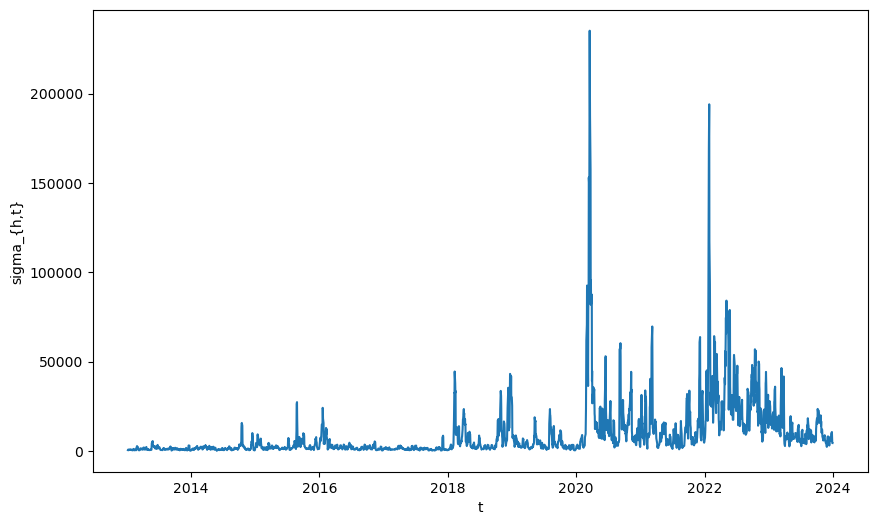

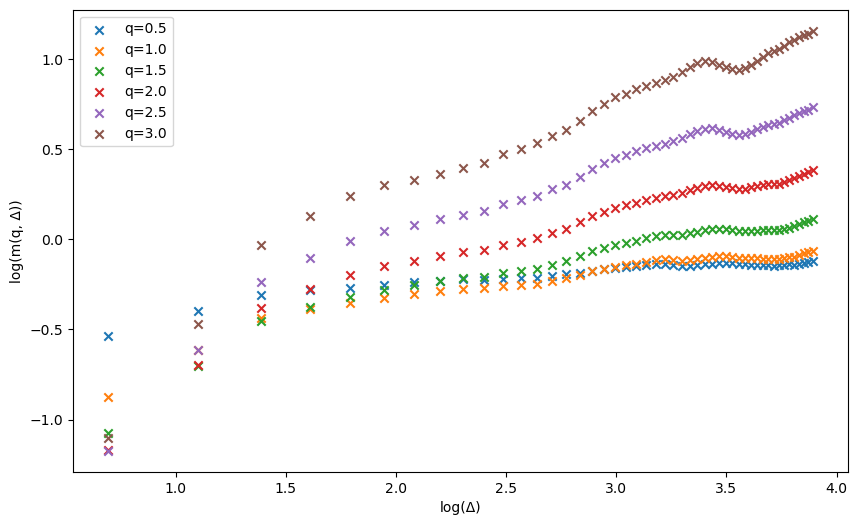

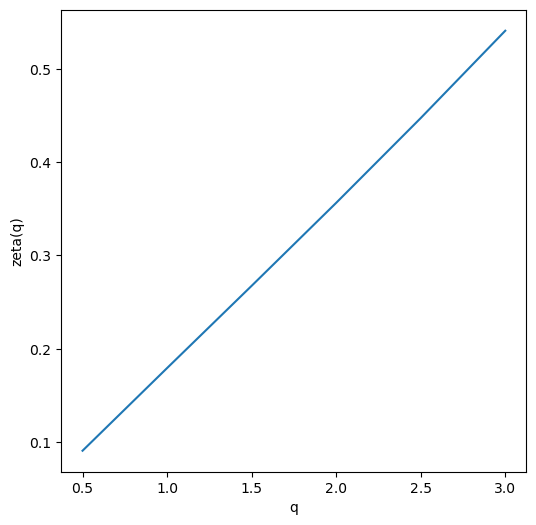

Estimation du coefficient de Hurst, H: 0.17967118384227265
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.212e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):           5.81e-09
Time:                        09:31:21   Log-Likelihood:                 29.707
No. Observations:                   6   AIC:                            -55.41
Df Residuals:                       4   BIC:                            -55.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/opt/mamba/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
run5(4)